DATA CLEANING AND PREPROCESSING

In [1]:
import pandas as pd 
import numpy as np
df=pd.read_csv(r"Real_Estate.csv")
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [2]:
#to CHeck if there are any null values present in the Dataset
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

There are no null values in the dataset.

In [3]:
df.duplicated().sum()

np.int64(0)

In [4]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x,y

(               Transaction date  House age  \
 0    2012-09-02 16:42:30.519336       13.3   
 1    2012-09-04 22:52:29.919544       35.5   
 2    2012-09-05 01:10:52.349449        1.1   
 3    2012-09-05 13:26:01.189083       22.2   
 4    2012-09-06 08:29:47.910523        8.5   
 ..                          ...        ...   
 409  2013-07-25 15:30:36.565239       18.3   
 410  2013-07-26 17:16:34.019780       11.9   
 411  2013-07-28 21:47:23.339050        0.0   
 412  2013-07-29 13:33:29.405317       35.9   
 413  2013-08-01 09:49:41.506402       12.0   
 
      Distance to the nearest MRT station  Number of convenience stores  \
 0                             4082.01500                             8   
 1                              274.01440                             2   
 2                             1978.67100                            10   
 3                             1055.06700                             5   
 4                              967.40000                  

Exploratory data analysis

In [5]:
descriptive_stats = df.describe()

print(descriptive_stats)

        House age  Distance to the nearest MRT station  \
count  414.000000                           414.000000   
mean    18.405072                          1064.468233   
std     11.757670                          1196.749385   
min      0.000000                            23.382840   
25%      9.900000                           289.324800   
50%     16.450000                           506.114400   
75%     30.375000                          1454.279000   
max     42.700000                          6306.153000   

       Number of convenience stores    Latitude   Longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.265700   24.973605  121.520268   
std                        2.880498    0.024178    0.026989   
min                        0.000000   24.932075  121.473888   
25%                        2.000000   24.952422  121.496866   
50%                        5.000000   24.974353  121.520912   
75%                        6.750000 

DATA VISUALIZATION

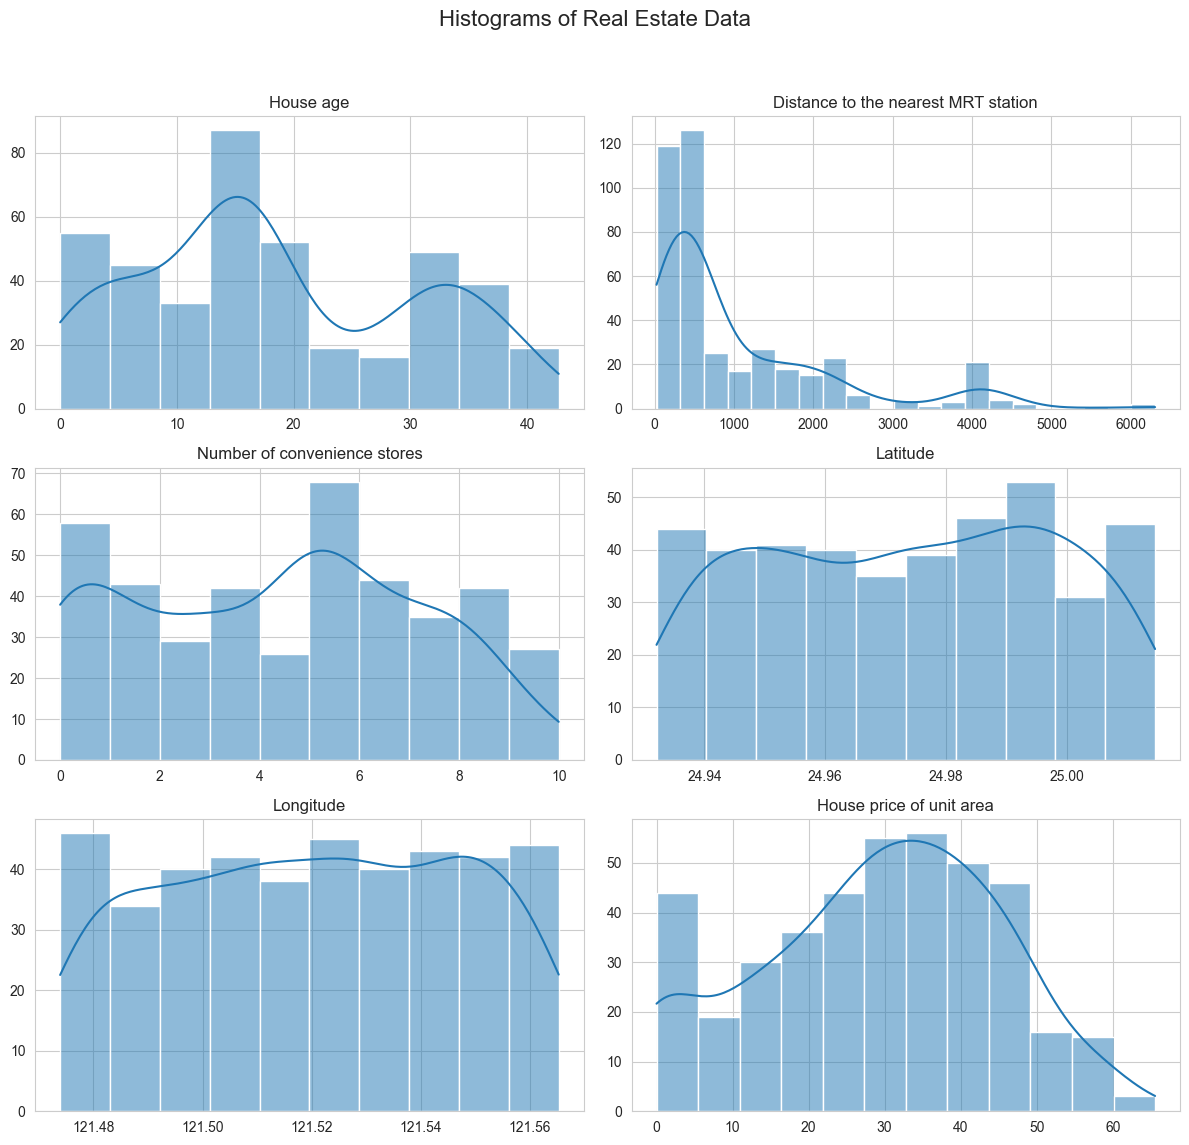

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Creating  histograms
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


OUTCOMES:

1)House Age: The distribution of house ages is relatively uniform, with a slight increase in the number of newer properties, indicating that a significant portion of the properties are relatively young:

2)Distance to the Nearest MRT Station: The majority of properties are located in close proximity to an MRT station, as evidenced by the high frequency of shorter distances. However, there is a long tail extending towards higher distances, which suggests the presence of some properties that are located quite far from MRT stations.

3)Number of Convenience Stores: The data reveals a wide range of values for the number of convenience stores, with distinct peaks at certain counts such as 0, 5, and 10. This indicates that there are certain common configurations in the availability of convenience stores across properties.

4)Latitude and Longitude: Both latitude and longitude distributions are relatively concentrated, implying that the properties are located within a geographically confined area, suggesting a focused region for the properties under analysis.

5)House Price of Unit Area: The distribution of house prices per unit area is right-skewed, with a higher concentration of properties in the lower price range. As the price increases, the number of properties decreases, indicating fewer high-priced properties relative to the majority of lower-priced ones.

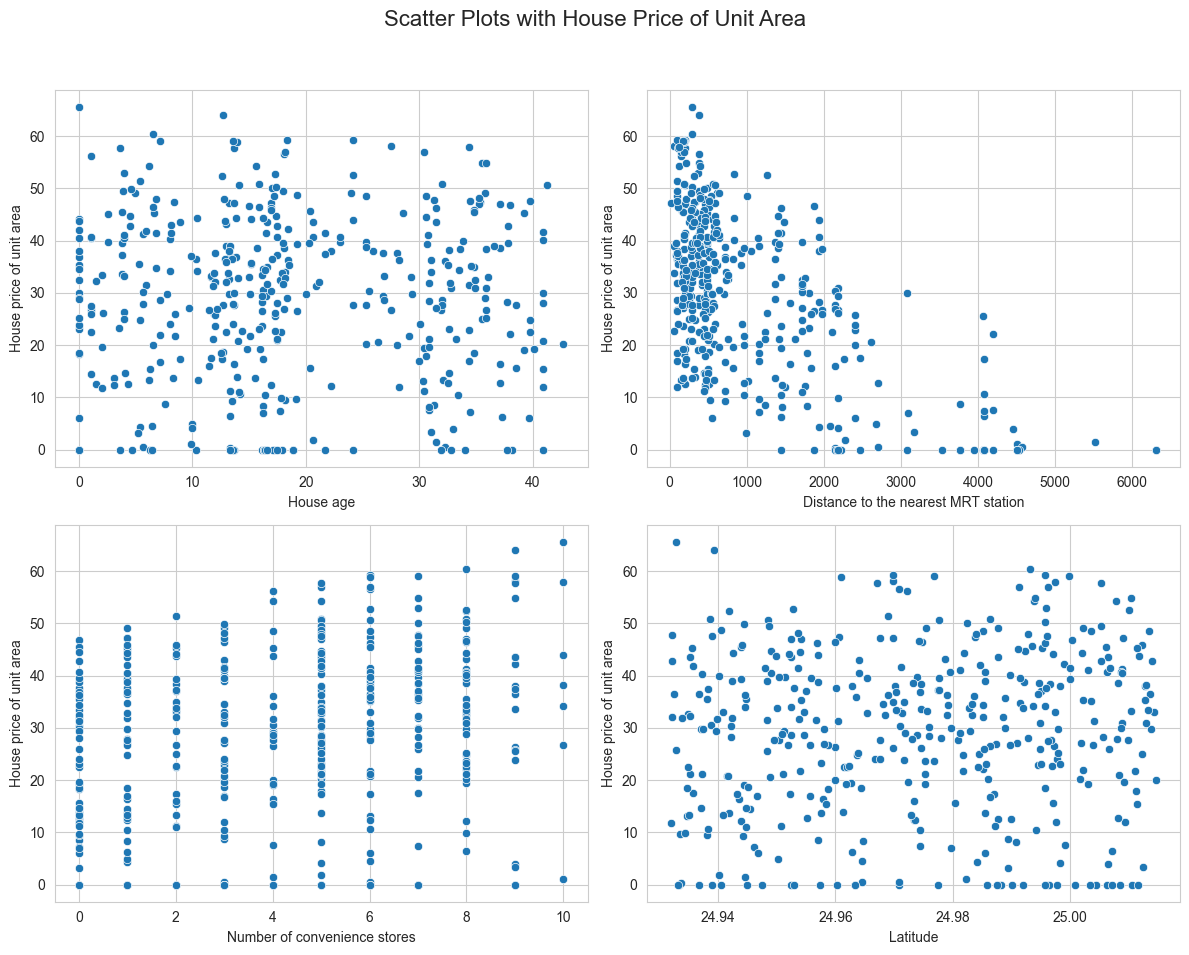

In [7]:
#exploring the relationships between these variables and the house price using Scatter Plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

# Scatter plot for each variable against the house price
sns.scatterplot(data=df, x='House age', y='House price of unit area', ax=axes[0, 0])
sns.scatterplot(data=df, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0, 1])
sns.scatterplot(data=df, x='Number of convenience stores', y='House price of unit area', ax=axes[1, 0])
sns.scatterplot(data=df, x='Latitude', y='House price of unit area', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The scatter plots revealed the following key relationships between factors and house prices:

1.House Age vs. House Price: No strong linear relationship, though both very new and very old houses may have higher prices.

2.Distance to the Nearest MRT Station vs. House Price: A clear negative correlation, with house prices decreasing as the distance to the MRT station increases.

3.Number of Convenience Stores vs. House Price: A positive relationship, where houses near more convenience stores tend to have higher prices.

4.Latitude vs. House Price: A weak pattern suggesting that certain latitudes may correspond to higher or lower house prices, potentially reflecting neighborhood desirability.

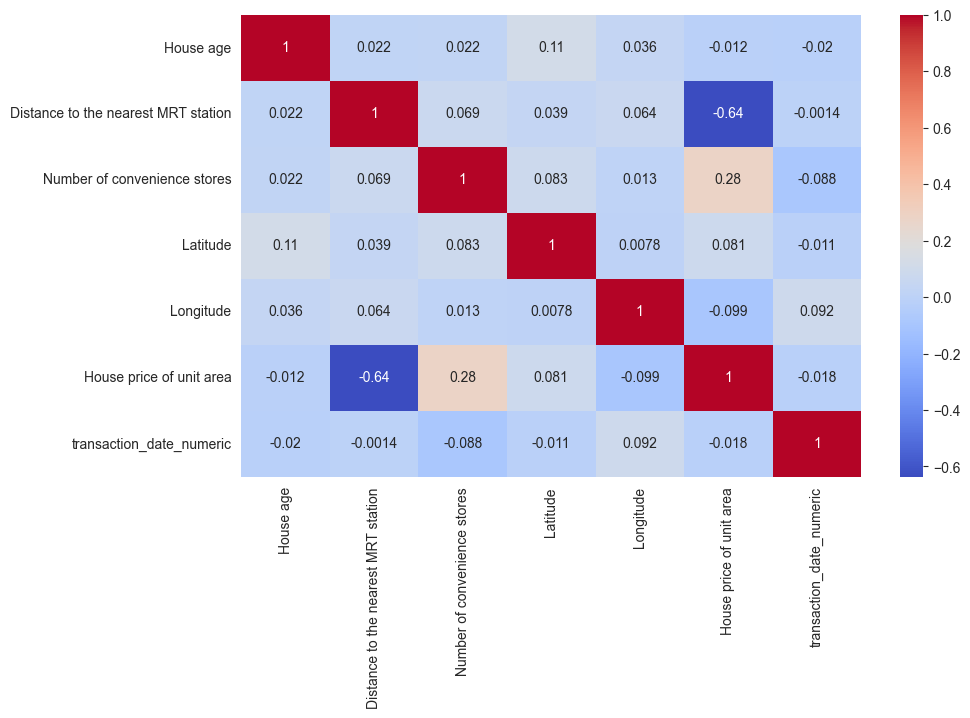

In [8]:
#correlation Matrix
df['Transaction date'] = pd.to_datetime(df['Transaction date'], errors='coerce')

# Convert the datetime to a Unix timestamp (seconds since epoch)
df['transaction_date_numeric'] = df['Transaction date'].astype('int64') // 10**9  # Convert to seconds

# Now, you can use the numeric date for correlation analysis
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


Overall, the most significant factors affecting house prices in this dataset are proximity to MRT stations and the number of nearby convenience stores. Geographical location (latitude and longitude) and house age appear to have a lesser impact on the price.

MODEL BUILDING

1)Splitting the dataset

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Selecting features and target variable
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = df[features]
y = df[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2)Model Training

In [10]:
# Model initialization
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

LinearRegression()

3)Evaluation and Visualization

In [11]:
# Making predictions using the Linear regression
y_pred = model.predict(X_test)
y_pred

array([38.58553308, 30.27545642, 30.63507225, 45.36862646, 23.20924222,
       32.62839508, 18.86501864, 29.94261815, 34.07952742,  5.89497833,
       32.85732428, 39.20080259,  9.53933735, 26.59244074, 36.4493457 ,
       30.28723911, 28.04489627, 25.25342026, 32.27376753, 35.64440194,
       40.13217328, 43.49105768, 24.99527978, 26.25085055, 17.96310001,
       35.10917253,  6.82443074, 32.53546274, 44.00560347, 32.58080109,
       35.41056515, 41.43623239, 46.47938892, 47.35823696, 30.94654249,
       29.06540547, 10.44054345, 41.18164338, 40.63191112, 36.76567644,
       40.89561923, 36.21231597, 11.10702158, -0.14343553, 35.9538785 ,
       25.73313557, 45.67606287, 38.33742609, 21.25117677, 38.94286756,
       -1.30303574, 31.26352603, 29.52005768, 33.56703122, 39.25100236,
       32.77587124, 36.74915176, 37.18692139, 44.94999821, 31.178298  ,
       16.49181449, 13.76905296, 29.07959522, 37.79205389, 20.92032617,
       24.53037498, 34.12597274, 24.55838808, 36.80419601, 26.47

In [12]:
y_test

358    35.762667
350    31.743662
373    27.786894
399    54.831664
369    39.416482
         ...    
31     15.564324
283    15.593247
157     3.398305
203     0.000000
208    28.601946
Name: House price of unit area, Length: 83, dtype: float64

In [13]:
model.score(X_test,y_test)

0.549673064094341

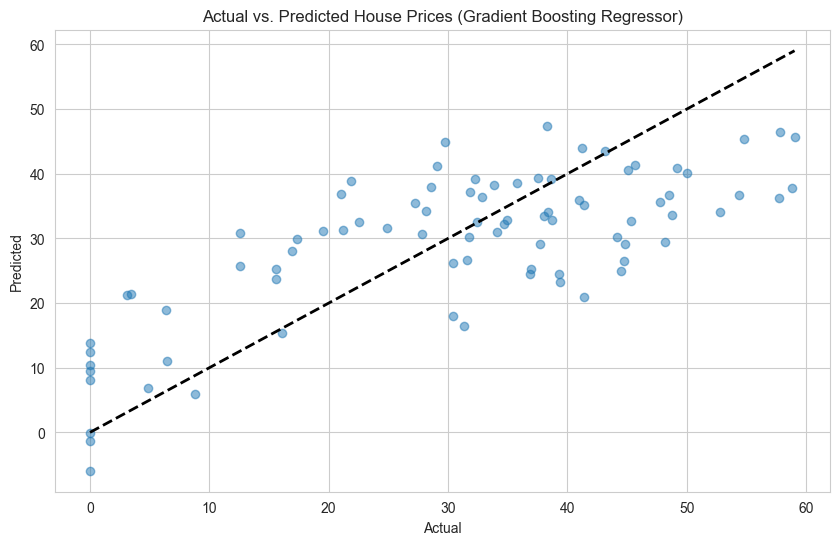

Mean Squared Error: 124.57938927549873
R^2 Score: 0.549673064094341


In [14]:
# Visualization: Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices (Gradient Boosting Regressor)')
plt.show()

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


In [15]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [16]:
import dash
from dash import html, dcc, Input, Output, State
import pandas as pd

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.Div([
        html.H1("Real Estate Price Prediction", style={'text-align': 'center'}),
        
        html.Div([
            dcc.Input(id='distance_to_mrt', type='number', placeholder='Distance to MRT Station (meters)',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='num_convenience_stores', type='number', placeholder='Number of Convenience Stores',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='latitude', type='number', placeholder='Latitude',
                      style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='longitude', type='number', placeholder='Longitude',
                      style={'margin': '10px', 'padding': '10px'}),
            html.Button('Predict Price', id='predict_button', n_clicks=0,
                        style={'margin': '10px', 'padding': '10px', 'background-color': '#007BFF', 'color': 'white'}),
        ], style={'text-align': 'center'}),
        
        html.Div(id='prediction_output', style={'text-align': 'center', 'font-size': '20px', 'margin-top': '20px'})
    ], style={'width': '50%', 'margin': '0 auto', 'border': '2px solid #007BFF', 'padding': '20px', 'border-radius': '10px'})
])

# Define callback to update output
@app.callback(
    Output('prediction_output', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('distance_to_mrt', 'value'), 
     State('num_convenience_stores', 'value'),
     State('latitude', 'value'),
     State('longitude', 'value')]
)
def update_output(n_clicks, distance_to_mrt, num_convenience_stores, latitude, longitude):
    if n_clicks > 0 and all(v is not None for v in [distance_to_mrt, num_convenience_stores, latitude, longitude]):
        # Prepare the feature vector
        features = pd.DataFrame([[distance_to_mrt, num_convenience_stores, latitude, longitude]], 
                                columns=['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude'])
        # Predict
        prediction = model.predict(features)[0]
        return f'Predicted House Price of Unit Area: {prediction:.2f}'
    elif n_clicks > 0:
        return 'Please enter all values to get a prediction'
    return ''

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)